# 3-panel plot of modeled versus observed ice thickness 
## panels:
   - ## model grad vs obs grad (flowline)
   - ## observations vs obs grad (gpr locations)
   - ## observations vs model grad (gpr locations)

In [7]:
##Ben Pelto Nov. 2019
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.path as mpath
import matplotlib.patches as mpatches

path = '/home/pelto/Desktop/ice_thick/'
f_in = 'smb_grad_ice_thick.csv' 

data = pd.read_csv(path + f_in)

markers = ('o', 's', 'D', '^', 'v', 'p', 'D') #MUST be equal to # of glaciers
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462', '#b3de69'] #MUST be equal to # of glaciers

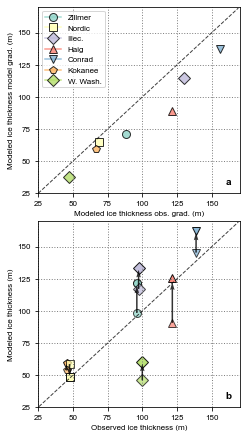

In [8]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)

xmax=170;ymax=170
xmin=25;ymin=25

# Create plot
axes = np.arange(1,2,1)
fig, axes = plt.subplots(2, 1, figsize=(3.34,6), sharey=True)

letter = 'a', 'b', 'c'
for n in range(2):
    axes[n].plot(np.arange(0, xmax), np.arange(0, ymax), '--', c='k', alpha=0.75, linewidth=1)
    axes[n].text(0.93,0.05, letter[n], fontweight='bold', fontsize=10, transform=axes[n].transAxes)
    axes[n].set_xlim(xmin,xmax)
    axes[n].set_ylim(ymin,ymax)
    axes[n].set_xticks(np.arange(xmin, xmax, 25))
    axes[n].set_yticks(np.arange(ymin, ymax, 25))
    axes[n].grid(linestyle=':', linewidth=1, color='gray', alpha=1.0, zorder=100)

### model obs grad versus model default grad (flowline)
  
z = 1

for x, y, site, marker, colors in zip(data['Ice_thickness_Obs_grad'], data['Ice_thickness_model_grad'], 
                              data['Glacier'], markers, colors):
    axes[0].plot(x,y, alpha=0.8, c=colors, marker=marker, label=site, markersize='8', markeredgecolor='k', zorder=1)
    z += 1
    if z >= 8: ## must be one greater than num. of points
        break
        
markers = ('o', 's', 'D', '^', 'v', 'p', 'D') 
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462', '#b3de69'] 


#model obs grad versus observations (gprlocs)
  
z = 1

for x, y, site, marker, colors in zip(data['Observed'], data['Ice_thickness_Obs_grad_gprlocs'], 
                              data['Glacier'], markers, colors):
    axes[1].plot(x,y, alpha=0.9, c=colors, marker=marker, label=site, markersize='8', markeredgecolor='k', zorder=1)
    z += 1
    if z >= 8:
        break

markers = ('o', 's', 'D', '^', 'v', 'p', 'D') 
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462', '#b3de69'] 

### model grad versus observations (gprlocs)
z = 1

x=data.Observed;y=data.Ice_thickness_model_grad_gprlocs;v=(data.Ice_thickness_Obs_grad_gprlocs-data.Ice_thickness_model_grad_gprlocs)
u=data.Observed-data.Observed
# patch = mpatches.PathPatch(path, facecolor='none', edgecolor='k', linewidth=0.75)
# axes[1].add_patch(patch)
axes[1].quiver(x, y, u, v, color='k', alpha=0.8, headaxislength=4.5, angles='xy', scale_units='xy', scale=1.1, zorder=2)


for x, y, site, marker, colors in zip(data['Observed'], data['Ice_thickness_model_grad_gprlocs'], 
                              data['Glacier'], markers, colors):
    axes[1].plot(x,y, alpha=0.7, c=colors, marker=marker, label=site, markersize='8', markeredgecolor='k', zorder=1)
    z += 1
    if z >= 8:
        break
        
axes[0].legend(loc=2)

axes[0].set_xlabel('Modeled ice thickness obs. grad. (m)')
axes[0].set_ylabel('Modeled ice thickness model grad. (m)')
# axes[2].set_xlabel('Observed ice thickness (m)')
# axes[2].set_ylabel('Modeled ice thickness obs. grad. (m)')
axes[1].set_xlabel('Observed ice thickness (m)')
axes[1].set_ylabel('Modeled ice thickness (m)')

plt.tight_layout(pad=0.5)
plt.savefig(path + 'JoG/obs_model_ice_thick_scatter_2panel_new.pdf', dpi=300)
plt.show()

In [ ]:
# font = {'family' : 'Arial',
#         'weight' : 'normal',
#         'size'   : 8}

# plt.rc('font', **font)

# xmax=180
# ymax=180

# # Create plot
# axes = np.arange(1,3,1)
# fig, axes = plt.subplots(1, 3, figsize=(7, 3.34), sharey=True)

# letter = 'a', 'b', 'c'
# for n in range(3):
#     axes[n].plot(np.arange(0, xmax), np.arange(0, ymax), '--', c='k', alpha=0.75, linewidth=1)
#     axes[n].text(162,8, letter[n], fontweight='bold', fontsize=10)
#     axes[n].set_xlim(0,xmax)
#     axes[n].set_ylim(0,ymax)
#     axes[n].set_xticks(np.arange(0, xmax, 25))
#     axes[n].set_yticks(np.arange(0, ymax, 25))
#     axes[n].grid(linestyle=':', linewidth=1, color='gray', alpha=1.0, zorder=100)

# ### model obs grad versus model default grad (flowline)
  
# z = 1

# for x, y, site, marker, colors in zip(data['Ice_thickness_Obs_grad'], data['Ice_thickness_model_grad'], 
#                               data['Glacier'], markers, colors):
#     axes[0].plot(x,y, alpha=0.8, c=colors, marker=marker, label=site, markersize='8', markeredgecolor='k', zorder=1)
#     z += 1
#     if z >= 8: ## must be one greater than num. of points
#         break
        
# markers = ('o', 's', 'D', '^', 'v', 'p', 'D') 
# colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462', '#b3de69'] 


# #model obs grad versus observations (gprlocs)
  
# z = 1

# for x, y, site, marker, colors in zip(data['Observed'], data['Ice_thickness_Obs_grad_gprlocs'], 
#                               data['Glacier'], markers, colors):
#     axes[1].plot(x,y, alpha=0.9, c=colors, marker=marker, label=site, markersize='8', markeredgecolor='k', zorder=1)
#     z += 1
#     if z >= 8:
#         break

# markers = ('o', 's', 'D', '^', 'v', 'p', 'D') 
# colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462', '#b3de69'] 

# ### model grad versus observations (gprlocs)
# z = 1

# x=data.Observed;y=data.Ice_thickness_model_grad_gprlocs;v=(data.Ice_thickness_Obs_grad_gprlocs-data.Ice_thickness_model_grad_gprlocs)
# u=data.Observed-data.Observed
# # patch = mpatches.PathPatch(path, facecolor='none', edgecolor='k', linewidth=0.75)
# # axes[1].add_patch(patch)
# axes[1].quiver(x, y, u, v, color='k', alpha=0.8, headaxislength=4.5, angles='xy', scale_units='xy', scale=1.1, zorder=2)


# for x, y, site, marker, colors in zip(data['Observed'], data['Ice_thickness_model_grad_gprlocs'], 
#                               data['Glacier'], markers, colors):
#     axes[1].plot(x,y, alpha=0.7, c=colors, marker=marker, label=site, markersize='8', markeredgecolor='k', zorder=1)
#     z += 1
#     if z >= 8:
#         break
        
# axes[0].legend(loc=2)

# axes[0].set_xlabel('Modeled ice thickness obs. grad. (m)')
# axes[0].set_ylabel('Modeled ice thickness model grad. (m)')
# axes[2].set_xlabel('Observed ice thickness (m)')
# axes[2].set_ylabel('Modeled ice thickness obs. grad. (m)')
# axes[1].set_xlabel('Observed ice thickness (m)')
# axes[1].set_ylabel('Modeled ice thickness model grad. (m)')

# plt.tight_layout(pad=0.5)
# plt.savefig(path + 'JoG/obs_model_ice_thick_scatter_3panel_new.pdf', dpi=300)
# plt.show()